In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brain-tumor-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F740566%2F2809126%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240521%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240521T110941Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D33bd3065ed20319b4369735a8dd3b282606bad9ab0952c56d00fa0eb5e6a1106f36219e2d1e7f7cc516dec41f13d6b9e0cacb6086df9e7d05920bdab7c35e95a30c2ae032e2fce258964b21a2c9873f28a69d6028ccd42dacfbe7fdf2fad70e3fdce173da8d317ddca78f24a2e874cd9a8b0e15b31356302c39040de5329cc6dbd47dfcc8f5f6ecb34faf672d589d98586b1e1fbb1efc1cc59d3ee2cce9827f978c37fa131a44df380eb52f81bb7e1703d602457ac005951bd9c107b1d1cb502f72cc206b754d827ccaf27030bfd74969a30d3eb29619929544a44d31a4e7719ded8c9236118ee9b5938df9ecc4b269a956794a5d441f89a5f4a913c1715d718'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 88097875 bytes downloaded
Downloaded and uncompressed: brain-tumor-detection
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-detection/yes/y873.jpg
/kaggle/input/brain-tumor-detection/yes/y1015.jpg
/kaggle/input/brain-tumor-detection/yes/y1464.jpg
/kaggle/input/brain-tumor-detection/yes/y1194.jpg
/kaggle/input/brain-tumor-detection/yes/y531.jpg
/kaggle/input/brain-tumor-detection/yes/y351.jpg
/kaggle/input/brain-tumor-detection/yes/y317.jpg
/kaggle/input/brain-tumor-detection/yes/y26.jpg
/kaggle/input/brain-tumor-detection/yes/y1123.jpg
/kaggle/input/brain-tumor-detection/yes/y126.jpg
/kaggle/input/brain-tumor-detection/yes/y748.jpg
/kaggle/input/brain-tumor-detection/yes/y885.jpg
/kaggle/input/brain-tumor-detection/yes/y446.jpg
/kaggle/input/brain-tumor-detection/yes/y153.jpg
/kaggle/input/brain-tumor-detection/yes/y1184.jpg
/kaggle/input/brain-tumor-detection/yes/y1169.jpg
/kaggle/input/brain-tumor-detection/yes/y500.jpg
/kaggle/input/brain-tumor-detection/yes/y555.jpg
/kaggle/input/brain-tumor-detection/yes/y13.jpg
/kaggle/input/brain-tumor-detection/yes/y936.jpg
/kaggle/input/br

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [ ]:
# Get the path of files
image_directory='../input/brain-tumor-detection/'

no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')
# initialize dataset and label arrays
dataset=[]
label=[]
# set input size
INPUT_SIZE=64

In [ ]:
#loop over each image in each category
for i , image_name in enumerate(no_tumor_images):
    #read the image if its extension is .jpg
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        #resize the image
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        #append image arry in dataset list and its label in label list
        dataset.append(np.array(image))
        label.append(0)

        # same for yes images
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset=np.array(dataset)
label=np.array(label)

In [ ]:
#print(dataset)
#print(label)
#print(len(label))

In [ ]:
# Convert the dataset & label to numpy array
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)

(2400, 64, 64, 3)
(2400,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(600, 64, 64, 3)
(600,)


In [ ]:
# Normalise the data for training purpose
x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)

In [ ]:
#y_train = to_categorical(y_train, num_classes=2)
#y_test = to_categorical(y_test, num_classes=2)

In [ ]:
# Building a simple CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),  kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
#model.add(Dense(2))
model.add(Activation('sigmoid'))
# model.add(Activation('softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                   

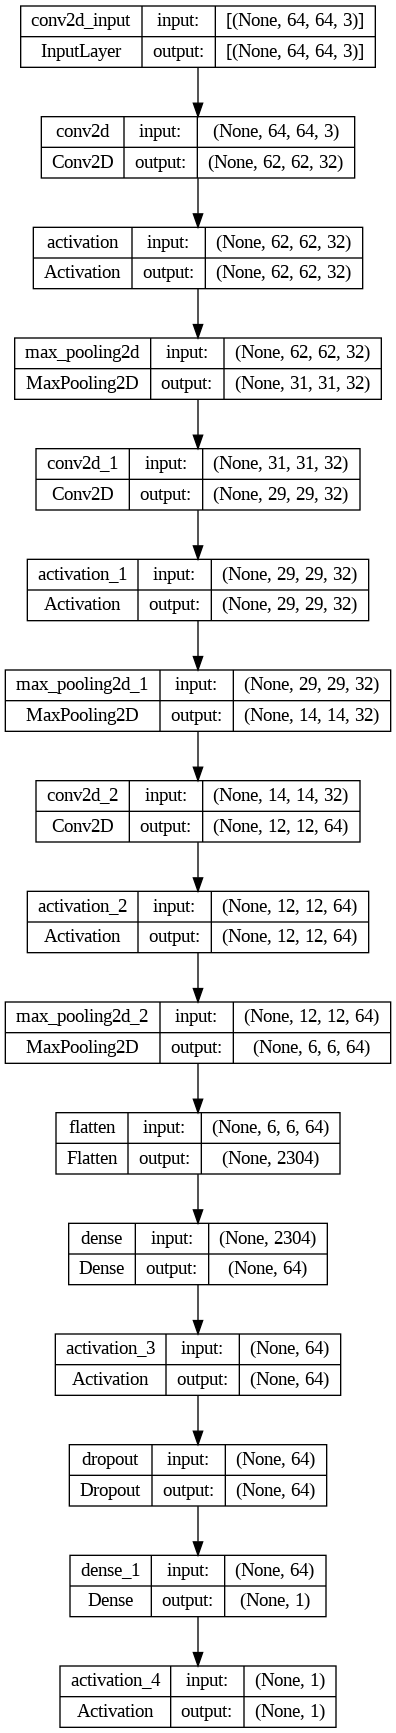

In [ ]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True,
                          expand_nested=True)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
batch_size = 16,
verbose = 1, epochs = 50,
validation_data = (x_test, y_test),
shuffle = 'False')

Epoch 1/50
150/150 [==============================] - 12s 69ms/step - loss: 0.5401 - accuracy: 0.7358 - val_loss: 0.4372 - val_accuracy: 0.8117
Epoch 2/50
150/150 [==============================] - 12s 81ms/step - loss: 0.4044 - accuracy: 0.8267 - val_loss: 0.3247 - val_accuracy: 0.8767
Epoch 3/50
150/150 [==============================] - 12s 82ms/step - loss: 0.2937 - accuracy: 0.8746 - val_loss: 0.2447 - val_accuracy: 0.8967
Epoch 4/50
150/150 [==============================] - 12s 80ms/step - loss: 0.2099 - accuracy: 0.9258 - val_loss: 0.1996 - val_accuracy: 0.9317
Epoch 5/50
150/150 [==============================] - 12s 80ms/step - loss: 0.1364 - accuracy: 0.9521 - val_loss: 0.1569 - val_accuracy: 0.9433
Epoch 6/50
150/150 [==============================] - 11s 73ms/step - loss: 0.0889 - accuracy: 0.9733 - val_loss: 0.1405 - val_accuracy: 0.9500
Epoch 7/50
150/150 [==============================] - 10s 64ms/step - loss: 0.0584 - accuracy: 0.9829 - val_loss: 0.1324 - val_accuracy:

In [ ]:
model.save('Brain Tumor detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Testing the model

import cv2
from keras.models import load_model
from PIL import Image
import numpy as np

model = load_model('Brain Tumor detection.h5')

In [ ]:
# Testing on one image
image = cv2.imread('../input/brain-tumor-detection/pred/pred13.jpg') #tumor detected
img = Image.fromarray(image)
img = img.resize((64,64))
img = np.array(img)
print(img)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [ 2  2  2]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 8  8  8]
  [22 22 22]
  [22 22 22]
  ...
  [11 11 11]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 8  8  8]
  [22 22 22]
  [22 22 22]
  ...
  [11 11 11]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 8  8  8]
  [22 22 22]
  [22 22 22]
  ...
  [10 10 10]
  [ 0  0  0]
  [ 0  0  0]]]


In [ ]:
input_img = np.expand_dims(img, axis=0)

result = model.predict(input_img)
print(result)

1/1 [==============================] - 0s 115ms/step
[[1.]]


In [ ]:
# Testing on one image
image = cv2.imread('../input/brain-tumor-detection/pred/pred0.jpg') # no tumor detected
img = Image.fromarray(image)
img = img.resize((64,64))
img = np.array(img)
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
input_img = np.expand_dims(img, axis=0)

result = model.predict(input_img)
print(result)

1/1 [==============================] - 0s 39ms/step
[[0.]]
